In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# read train test data
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [31]:
train_df[['Survived', 'Pclass']].groupby(['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [46]:
pclass_rate = train_df[[ 'Pclass', 'Survived',]].groupby(['Pclass'], as_index=False).mean()

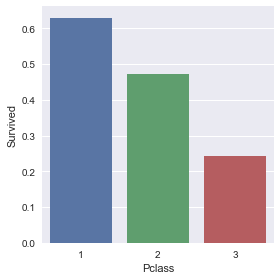

In [47]:
sns.factorplot(x='Pclass', y="Survived", data=pclass_rate, kind='bar')

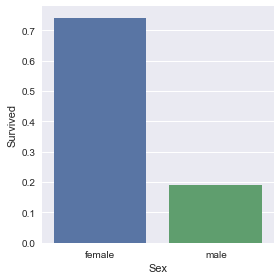

In [50]:
sns.factorplot(x='Sex', y='Survived', data=train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean(), kind='bar')

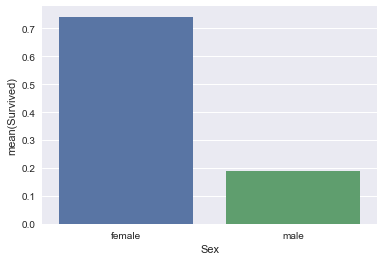

In [53]:
sns.barplot(x='Sex', y='Survived', data=train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

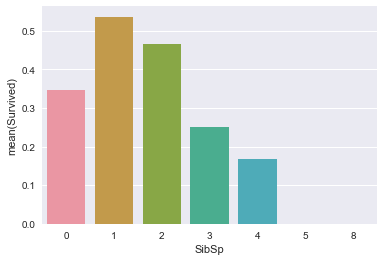

In [56]:
sns.barplot(x='SibSp', y='Survived', data=train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean())

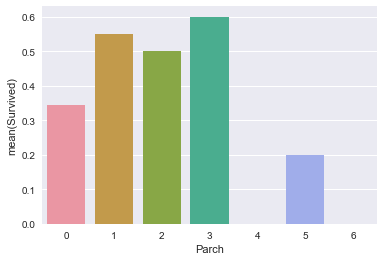

In [57]:
sns.barplot(x='Parch', y='Survived', data=train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean())

In [58]:
# 增加家人这个选项
train_df['Family'] = train_df['Parch'] + train_df['SibSp']

In [66]:
family = train_df[['Family', "Survived"]].groupby("Family", as_index=False).mean()

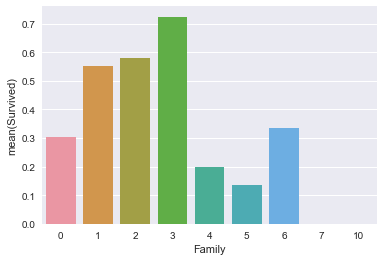

In [67]:
sns.barplot(x='Family', y='Survived', data=family,)

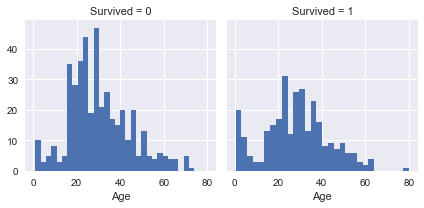

In [79]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=30)

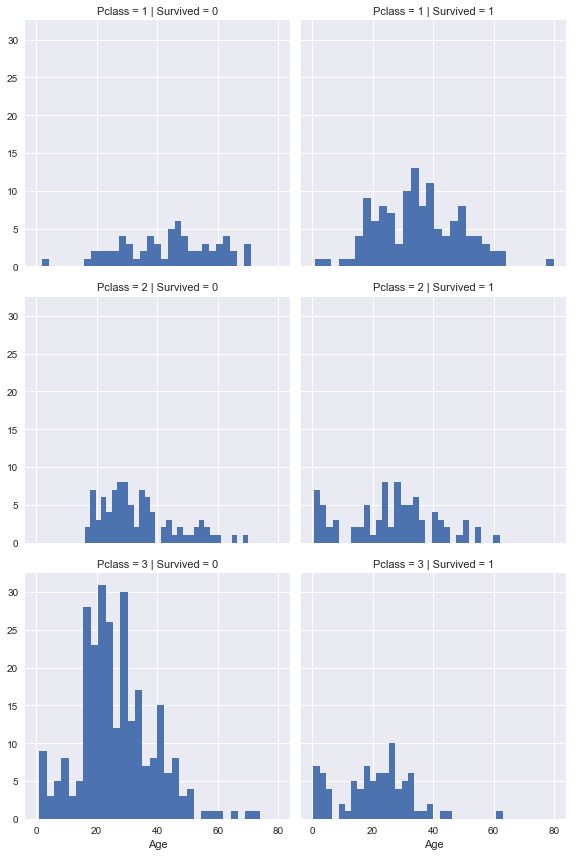

In [84]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass", size=4)
g.map(plt.hist, 'Age', bins=30)
g.add_legend()